In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pickle

df = pd.read_csv('outliers/df_raw.csv')

with open(f'outliers/data.pickle', 'rb') as handle:
    data = pickle.load(handle)
with open(f'outliers/process.pickle', 'rb') as handle:
    process = pickle.load(handle)

X = pd.concat([data['X_train'], data['X_test'], data['X_val']])
y = np.concatenate([data['y_train'], data['y_test'], data['y_val']])
Xy = X.copy()
Xy['META__revenue'] = y

def print_box_plot(col, name):
    print(name)
    fig = plt.figure(figsize =(10, 7)) 
    plt.boxplot(col[~pd.isna(col)]) 
    plt.title(name)
    plt.show() 

budget


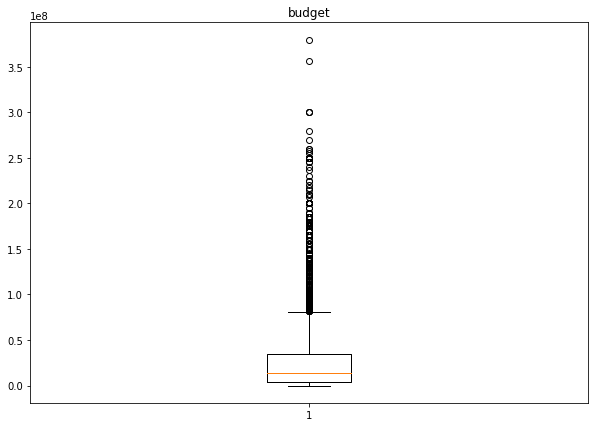

runtime


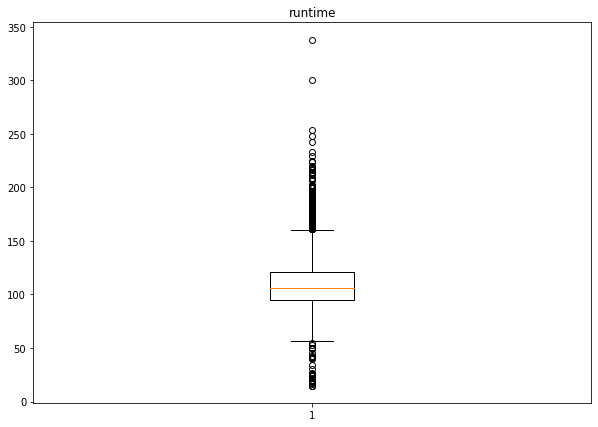

competition


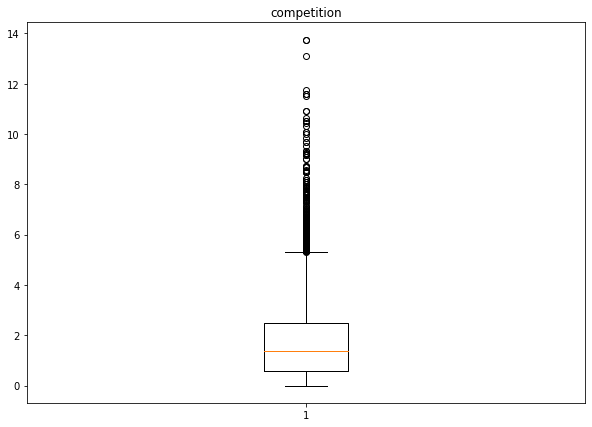

META__revenue


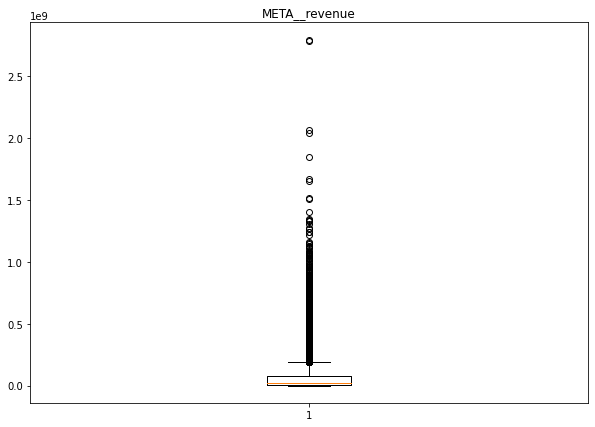

META__profitability


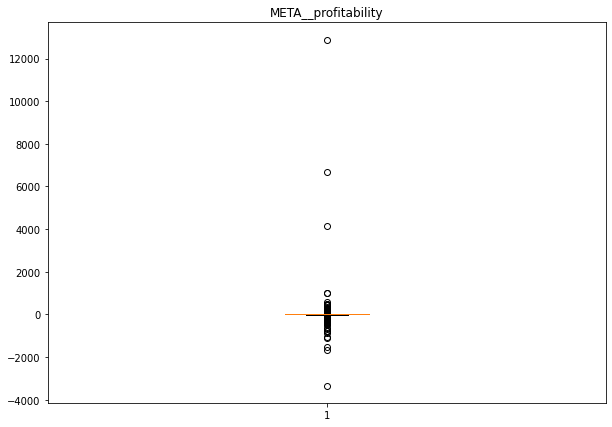

META__year_avg_profitability


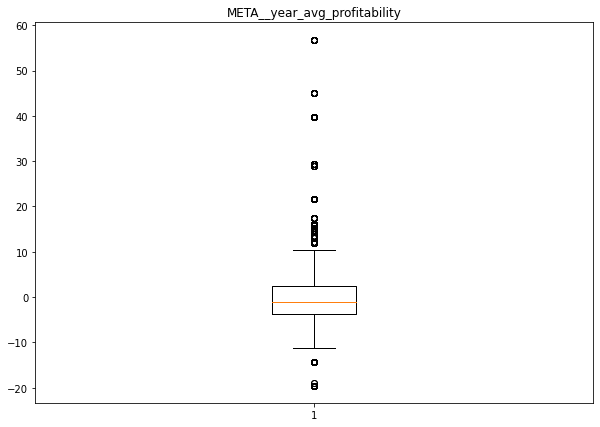

In [32]:
for c in ['budget', 'runtime', 'competition', 'META__revenue', 'META__profitability', 'META__year_avg_profitability']:
    d = df[c].values[~pd.isna(df[c].values)]
    if type(d[0]) != str:
        print_box_plot(df[c].values, c)

In [ ]:
# for c in ['budget', 'runtime', 'competition', 'META__revenue', 'META__profitability', 'META__year_avg_profitability']:
for c in Xy.columns:
    if np.unique(Xy[c].values).shape[0] > 2:
        print_box_plot(Xy[c].values, c)

In [12]:
print(len([c for c in Xy.columns if np.unique(Xy[c].values).shape[0] > 2 and not 'gender' in c and not 'day' in c and not 'month' in c and not 'movies_before' in c]))

94
